In [1]:
import os
import pandas as pd

In [3]:
results = pd.read_json(os.path.join('data','ergast-results.json'))

In [15]:
results.groupby('constructor')['raceId'].nunique().nlargest(20)

constructor
Ferrari        1093
McLaren         922
Williams        836
Tyrrell         433
Sauber          412
Renault         403
Team Lotus      395
Red Bull        387
Minardi         345
Ligier          330
Mercedes        310
Brabham         308
Arrows          296
Toro Rosso      268
Benetton        260
Jordan          250
Alfa Romeo      216
Force India     212
BRM             208
March           196
Name: raceId, dtype: int64

In [33]:
ferrari = set(results[results['constructor'] == 'Ferrari']['name'].drop_duplicates().to_list())

In [35]:
mclaren = set(results[results['constructor'] == 'McLaren']['name'].drop_duplicates().to_list())

In [37]:
williams = set(results[results['constructor'] == 'Williams']['name'].drop_duplicates().to_list())

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def create_venn3(set1, set2, set3, labels, colors):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Set up the circles' centers and radius
    radius = 1
    circle1_center = (-0.5, 0.3)
    circle2_center = (0.5, 0.3)
    circle3_center = (0, -0.5)
    
    # Create circles
    circle1 = plt.Circle(circle1_center, radius, alpha=0.3, fc=colors[0], label=labels[0])
    circle2 = plt.Circle(circle2_center, radius, alpha=0.3, fc=colors[1], label=labels[1])
    circle3 = plt.Circle(circle3_center, radius, alpha=0.3, fc=colors[2], label=labels[2])
    
    # Add circles to plot
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    
    # Calculate intersections
    all_three = set1 & set2 & set3
    set1_set2 = set1 & set2 - set3
    set1_set3 = set1 & set3 - set2
    set2_set3 = set2 & set3 - set1
    only_set1 = set1 - set2 - set3
    only_set2 = set2 - set1 - set3
    only_set3 = set3 - set1 - set2
    
    # Add counts as text
    plt.text(-0.5, 0.3, f"{len(only_set1)}", ha='center', va='center')  # Set 1 only
    plt.text(0.5, 0.3, f"{len(only_set2)}", ha='center', va='center')   # Set 2 only
    plt.text(0, -0.5, f"{len(only_set3)}", ha='center', va='center')    # Set 3 only
    plt.text(0, 0, f"{len(all_three)}", ha='center', va='center')       # All three
    plt.text(0, 0.5, f"{len(set1_set2)}", ha='center', va='center')     # Sets 1 & 2
    plt.text(-0.3, -0.2, f"{len(set1_set3)}", ha='center', va='center') # Sets 1 & 3
    plt.text(0.3, -0.2, f"{len(set2_set3)}", ha='center', va='center')  # Sets 2 & 3
    
    # Add labels
    plt.text(-1.2, 0.3, labels[0], ha='center', va='center', color=colors[0], fontsize=12, fontweight='bold')
    plt.text(1.2, 0.3, labels[1], ha='center', va='center', color=colors[1], fontsize=12, fontweight='bold')
    plt.text(0, -1.2, labels[2], ha='center', va='center', color=colors[2], fontsize=12, fontweight='bold')
    
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    
    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add title
    plt.title("F1 Teams Driver Overlap", pad=20)
    
    return fig, ax


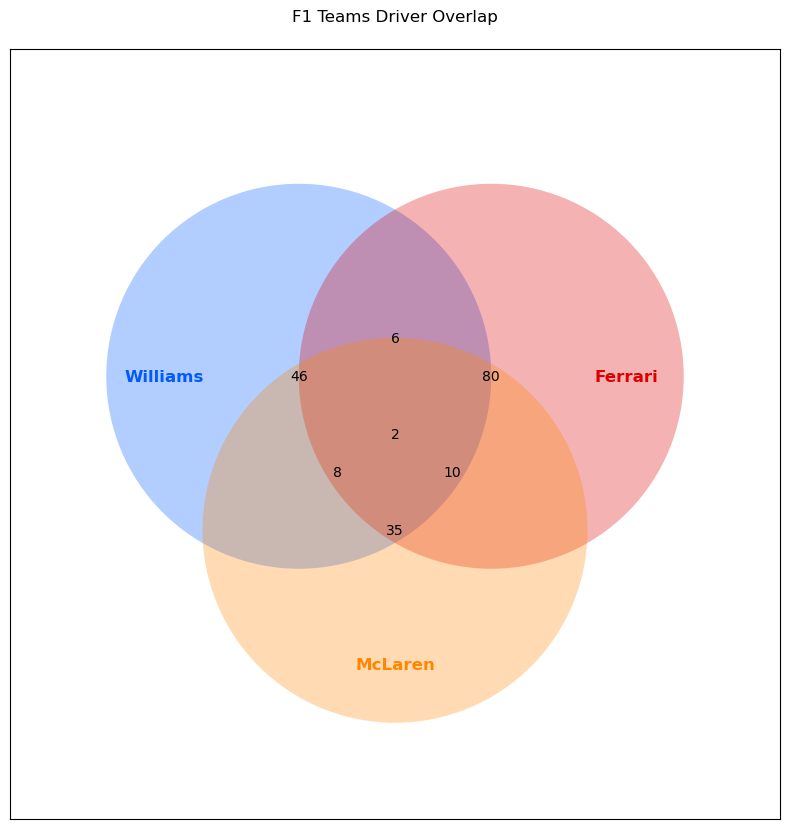

In [39]:
colors = ['#005AFF', '#DC0000', '#FF8700']  # Williams Blue, Ferrari Red, McLaren Orange
labels = ['Williams', 'Ferrari', 'McLaren']

# Create the diagram
fig, ax = create_venn3(williams, ferrari, mclaren, labels, colors)

# Show plot
plt.show()

In [43]:
williams & mclaren & ferrari

{'Alain Prost', 'Nigel Mansell'}

In [45]:
williams & mclaren

{'Alain Prost',
 'Alexander Wurz',
 'Ayrton Senna',
 'David Coulthard',
 'Jenson Button',
 'Juan Pablo Montoya',
 'Keke Rosberg',
 'Martin Brundle',
 'Nelson Piquet',
 'Nigel Mansell'}

In [47]:
mclaren & ferrari

{'Alain Prost',
 'Carlos Sainz',
 'Fernando Alonso',
 'Gerhard Berger',
 'Gilles Villeneuve',
 'Jacky Ickx',
 'Jody Scheckter',
 'Kimi Räikkönen',
 'Nigel Mansell',
 'Niki Lauda',
 'Patrick Tambay',
 'Stefan Johansson'}

In [49]:
williams & ferrari

{'Alain Prost',
 'Arturo Merzario',
 'Carlos Reutemann',
 'Clay Regazzoni',
 'Felipe Massa',
 'Mario Andretti',
 'Nigel Mansell',
 'Rubens Barrichello'}

In [51]:
def create_venn3(set1, set2, set3, labels, colors):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 12))  # Increased figure size for better text visibility
    
    # Set up the circles' centers and radius
    radius = 1
    circle1_center = (-0.5, 0.3)
    circle2_center = (0.5, 0.3)
    circle3_center = (0, -0.5)
    
    # Create circles
    circle1 = plt.Circle(circle1_center, radius, alpha=0.3, fc=colors[0], label=labels[0])
    circle2 = plt.Circle(circle2_center, radius, alpha=0.3, fc=colors[1], label=labels[1])
    circle3 = plt.Circle(circle3_center, radius, alpha=0.3, fc=colors[2], label=labels[2])
    
    # Add circles to plot
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    
    # Calculate intersections
    all_three = set1 & set2 & set3
    set1_set2 = set1 & set2 - set3
    set1_set3 = set1 & set3 - set2
    set2_set3 = set2 & set3 - set1
    only_set1 = set1 - set2 - set3
    only_set2 = set2 - set1 - set3
    only_set3 = set3 - set1 - set2
    
    # Function to format set items into a string
    def format_items(items):
        return '\n'.join(sorted(items))
    
    # Add items as text
    plt.text(-0.5, 0.3, format_items(only_set1), ha='center', va='center', fontsize=9)     # Set 1 only
    plt.text(0.5, 0.3, format_items(only_set2), ha='center', va='center', fontsize=9)      # Set 2 only
    plt.text(0, -0.5, format_items(only_set3), ha='center', va='center', fontsize=9)       # Set 3 only
    plt.text(0, 0, format_items(all_three), ha='center', va='center', fontsize=9)          # All three
    plt.text(0, 0.5, format_items(set1_set2), ha='center', va='center', fontsize=9)        # Sets 1 & 2
    plt.text(-0.3, -0.2, format_items(set1_set3), ha='center', va='center', fontsize=9)    # Sets 1 & 3
    plt.text(0.3, -0.2, format_items(set2_set3), ha='center', va='center', fontsize=9)     # Sets 2 & 3
    
    # Add labels
    plt.text(-1.2, 0.3, labels[0], ha='center', va='center', color=colors[0], fontsize=12, fontweight='bold')
    plt.text(1.2, 0.3, labels[1], ha='center', va='center', color=colors[1], fontsize=12, fontweight='bold')
    plt.text(0, -1.2, labels[2], ha='center', va='center', color=colors[2], fontsize=12, fontweight='bold')
    
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    
    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add title
    plt.title("F1 Teams Driver Overlap", pad=20)
    
    return fig, ax


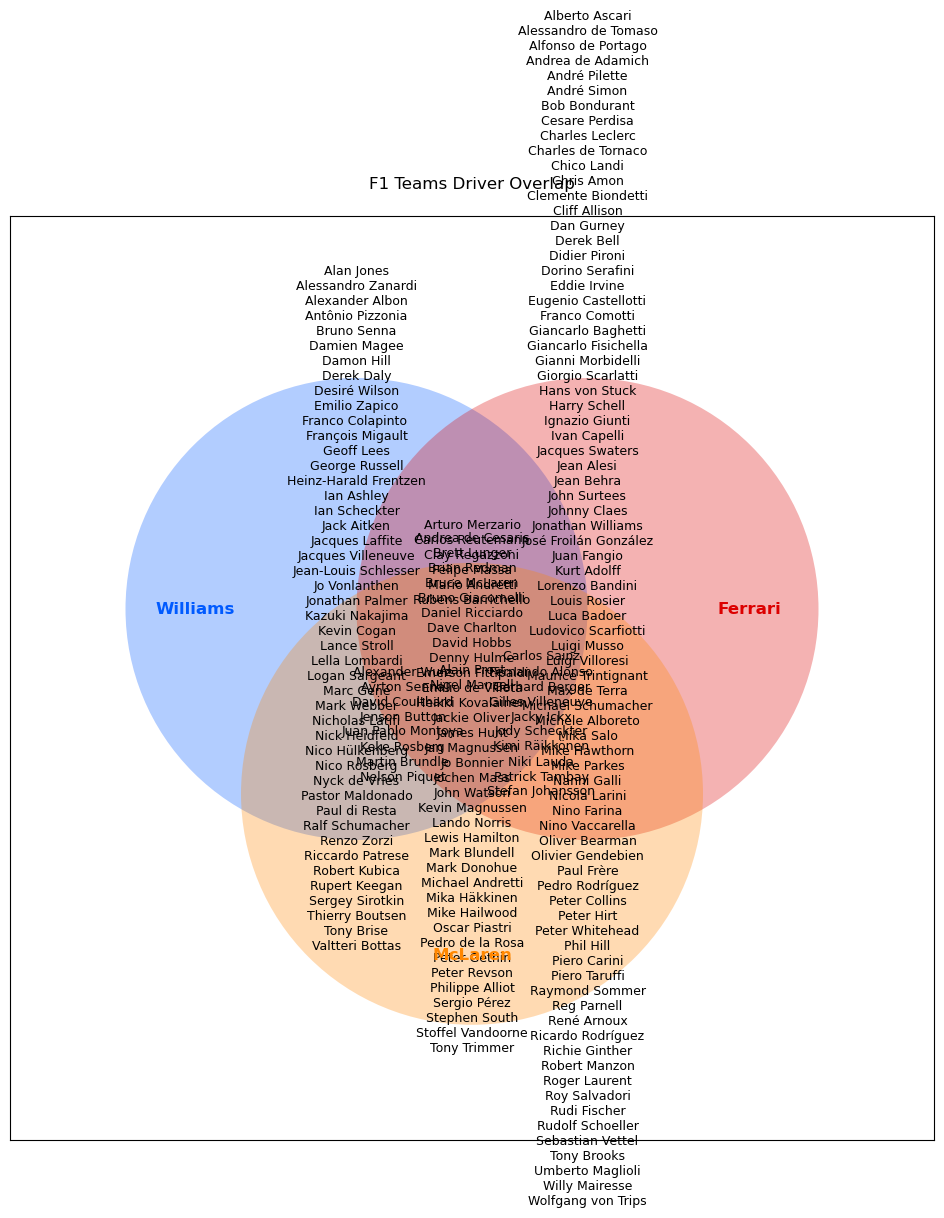

In [53]:
fig, ax = create_venn3(williams, ferrari, mclaren, labels, colors)

In [55]:
def create_venn3(set1, set2, set3, labels, colors):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Set up the circles' centers and radius
    radius = 1
    circle1_center = (-0.5, 0.3)
    circle2_center = (0.5, 0.3)
    circle3_center = (0, -0.5)
    
    # Create circles
    circle1 = plt.Circle(circle1_center, radius, alpha=0.3, fc=colors[0], label=labels[0])
    circle2 = plt.Circle(circle2_center, radius, alpha=0.3, fc=colors[1], label=labels[1])
    circle3 = plt.Circle(circle3_center, radius, alpha=0.3, fc=colors[2], label=labels[2])
    
    # Add circles to plot
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    
    # Calculate intersections (only overlapping regions)
    all_three = set1 & set2 & set3
    set1_set2 = set1 & set2 - set3
    set1_set3 = set1 & set3 - set2
    set2_set3 = set2 & set3 - set1
    
    # Function to format set items into a string
    def format_items(items):
        if items:  # Only return formatted string if there are items
            return '\n'.join(sorted(items))
        return ""  # Return empty string if no items
    
    # Add intersecting items as text
    plt.text(0, 0, format_items(all_three), ha='center', va='center', fontsize=10)          # All three
    plt.text(0, 0.5, format_items(set1_set2), ha='center', va='center', fontsize=10)        # Sets 1 & 2
    plt.text(-0.3, -0.2, format_items(set1_set3), ha='center', va='center', fontsize=10)    # Sets 1 & 3
    plt.text(0.3, -0.2, format_items(set2_set3), ha='center', va='center', fontsize=10)     # Sets 2 & 3
    
    # Add labels
    plt.text(-1.2, 0.3, labels[0], ha='center', va='center', color=colors[0], fontsize=12, fontweight='bold')
    plt.text(1.2, 0.3, labels[1], ha='center', va='center', color=colors[1], fontsize=12, fontweight='bold')
    plt.text(0, -1.2, labels[2], ha='center', va='center', color=colors[2], fontsize=12, fontweight='bold')
    
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    
    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add title
    plt.title("F1 Teams Driver Overlap", pad=20)
    
    return fig, ax


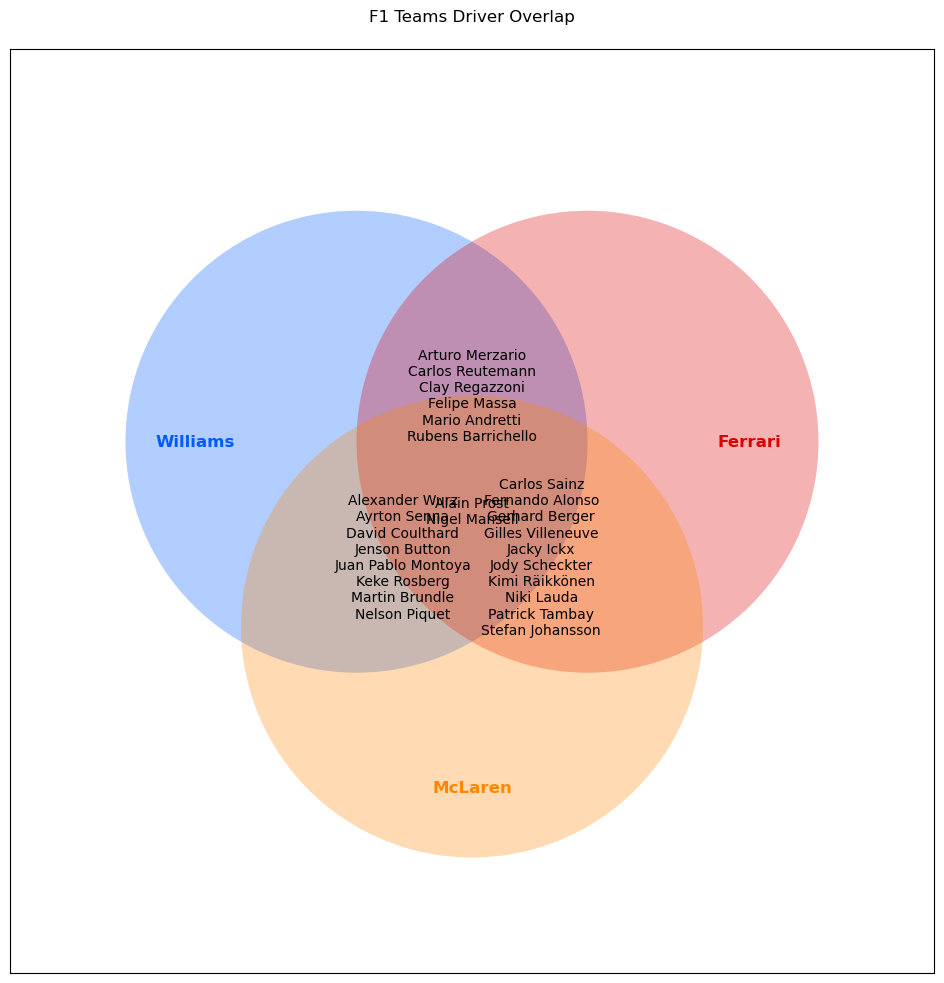

In [57]:
# Create the diagram
fig, ax = create_venn3(williams, ferrari, mclaren, labels, colors)

# Show plot
plt.show()